Using device: cuda
Training samples: 2268
Validation samples: 189
Test samples: 189
Total parameters: 31,039,361
Starting training...

Epoch 1/200


Val batch: 100%|██████████| 48/48 [00:05<00:00,  8.69it/s]


Train Loss: 1.146081
Val Loss: 1.105781 | IoU: 0.2997 | Dice: 0.4612 | F1: 0.4612
Saved best model with validation loss: 1.105781

Epoch 2/200


Val batch: 100%|██████████| 48/48 [00:04<00:00, 10.20it/s]


Train Loss: 0.979874
Val Loss: 0.953096 | IoU: 0.3366 | Dice: 0.5036 | F1: 0.5036
Saved best model with validation loss: 0.953096

Epoch 3/200


Val batch: 100%|██████████| 48/48 [00:04<00:00, 10.00it/s]


Train Loss: 0.921652
Val Loss: 0.909670 | IoU: 0.3599 | Dice: 0.5293 | F1: 0.5293
Saved best model with validation loss: 0.909670

Epoch 4/200


Val batch: 100%|██████████| 48/48 [00:04<00:00, 10.02it/s]


Train Loss: 0.868354
Val Loss: 0.899555 | IoU: 0.3702 | Dice: 0.5403 | F1: 0.5403
Saved best model with validation loss: 0.899555

Epoch 5/200


Val batch: 100%|██████████| 48/48 [00:04<00:00, 10.13it/s]


Train Loss: 0.843553
Val Loss: 0.859243 | IoU: 0.3591 | Dice: 0.5285 | F1: 0.5285
Saved best model with validation loss: 0.859243

Epoch 6/200


Val batch: 100%|██████████| 48/48 [00:04<00:00, 10.23it/s]


Train Loss: 0.805898
Val Loss: 0.821660 | IoU: 0.4175 | Dice: 0.5891 | F1: 0.5891
Saved best model with validation loss: 0.821660

Epoch 7/200


Val batch: 100%|██████████| 48/48 [00:04<00:00, 10.05it/s]


Train Loss: 0.770976
Val Loss: 0.862080 | IoU: 0.3500 | Dice: 0.5185 | F1: 0.5185

Epoch 8/200


Val batch: 100%|██████████| 48/48 [00:04<00:00, 10.26it/s]


Train Loss: 0.748793
Val Loss: 0.810101 | IoU: 0.4381 | Dice: 0.6093 | F1: 0.6093
Saved best model with validation loss: 0.810101

Epoch 9/200


Val batch: 100%|██████████| 48/48 [00:04<00:00, 10.10it/s]


Train Loss: 0.721265
Val Loss: 0.788035 | IoU: 0.4368 | Dice: 0.6080 | F1: 0.6080
Saved best model with validation loss: 0.788035

Epoch 10/200


Val batch: 100%|██████████| 48/48 [00:04<00:00, 10.01it/s]


Train Loss: 0.687450
Val Loss: 0.806471 | IoU: 0.4310 | Dice: 0.6024 | F1: 0.6024

Epoch 11/200


Val batch: 100%|██████████| 48/48 [00:04<00:00, 10.21it/s]


Train Loss: 0.662717
Val Loss: 0.795326 | IoU: 0.4528 | Dice: 0.6233 | F1: 0.6233

Epoch 12/200


Val batch: 100%|██████████| 48/48 [00:04<00:00, 10.11it/s]


Train Loss: 0.621459
Val Loss: 0.855425 | IoU: 0.4080 | Dice: 0.5796 | F1: 0.5796

Epoch 13/200


Val batch: 100%|██████████| 48/48 [00:04<00:00, 10.26it/s]


Train Loss: 0.598046
Val Loss: 0.870252 | IoU: 0.4329 | Dice: 0.6042 | F1: 0.6042

Epoch 14/200


Val batch: 100%|██████████| 48/48 [00:04<00:00, 10.23it/s]


Train Loss: 0.576975
Val Loss: 0.866420 | IoU: 0.4348 | Dice: 0.6061 | F1: 0.6061
Early stopping triggered after 14 epochs


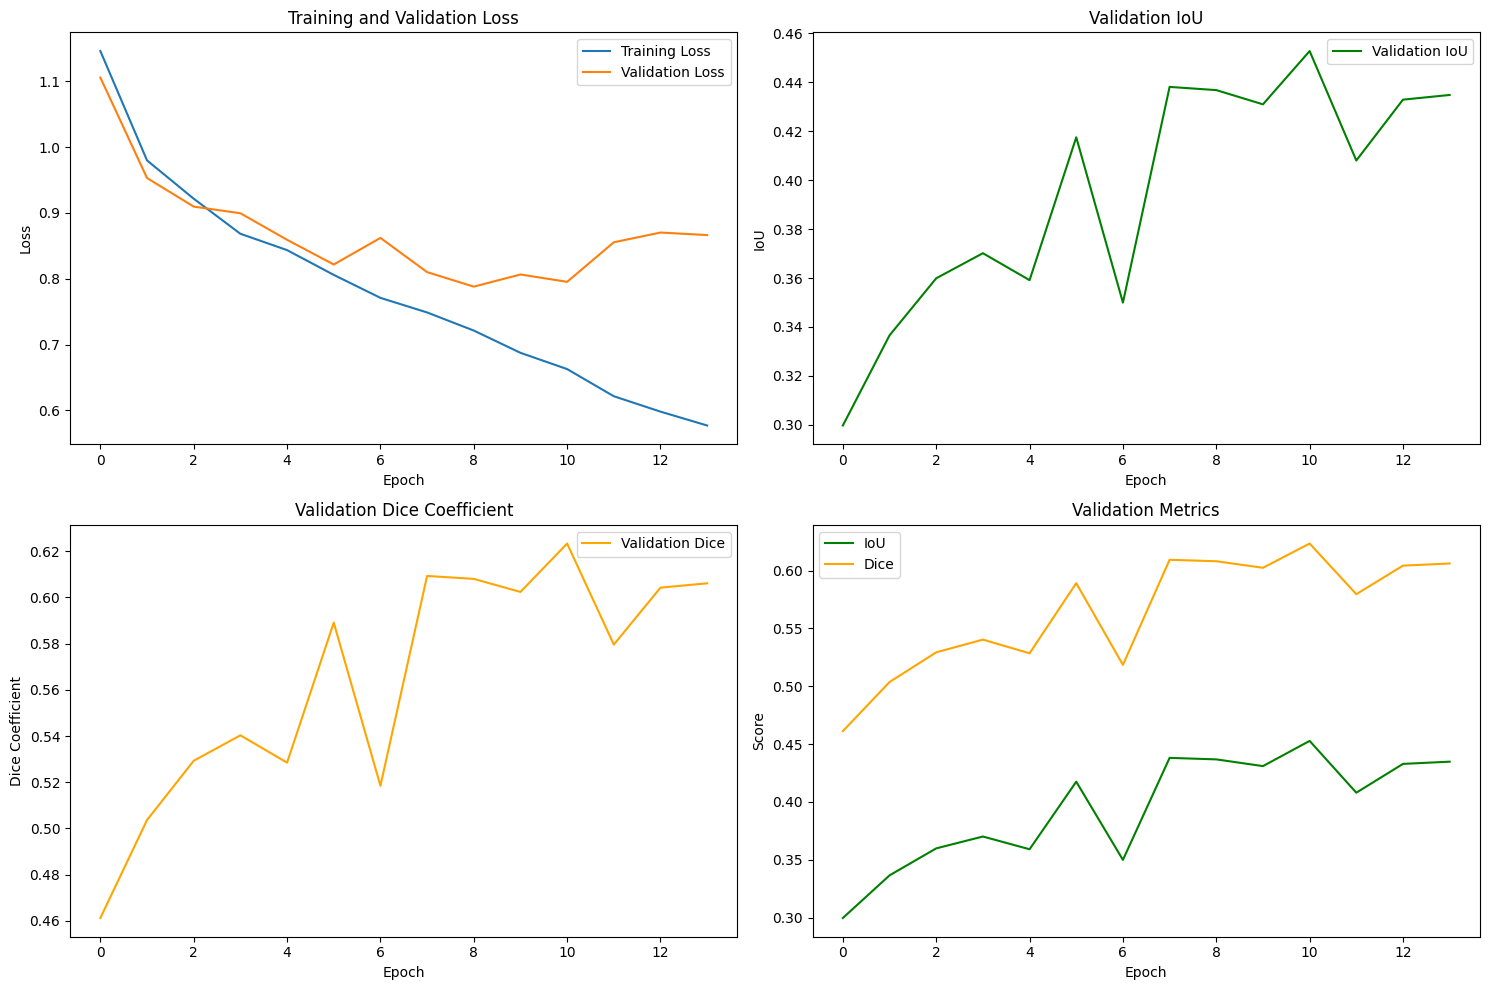

Loading best model for test evaluation...

Evaluating on test set...


Val batch: 100%|██████████| 48/48 [00:06<00:00,  7.98it/s]


TEST EVALUATION METRICS
Loss:            0.736051
IoU:             0.4658
Dice Coefficient: 0.6356
Accuracy:        0.9196
Precision:       0.6116
Recall:          0.6614
F1-Score:        0.6356
Confusion matrix (pixel-level):
[[10521622   551543]
 [  444575   868564]]
Training and evaluation completed!


In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
import seaborn as sns

# Check if CUDA is available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# -------------------------
# UNet4 Architecture (same as second code)
# -------------------------
class DoubleConv(nn.Module):
    def __init__(self, in_ch, out_ch):
        super().__init__()
        self.double_conv = nn.Sequential(
            nn.Conv2d(in_ch, out_ch, kernel_size=3, padding=1, bias=False),
            nn.BatchNorm2d(out_ch),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_ch, out_ch, kernel_size=3, padding=1, bias=False),
            nn.BatchNorm2d(out_ch),
            nn.ReLU(inplace=True),
        )

    def forward(self, x):
        return self.double_conv(x)

class UNet4(nn.Module):
    """U-Net with 4 encoder blocks, bottleneck, and 4 decoder blocks (same as second code)"""
    def __init__(self, in_channels=6, out_channels=1, features=[64,128,256,512]):
        super().__init__()
        # 4 Encoder blocks
        self.enc1 = DoubleConv(in_channels, features[0])
        self.pool1 = nn.MaxPool2d(2)
        self.enc2 = DoubleConv(features[0], features[1])
        self.pool2 = nn.MaxPool2d(2)
        self.enc3 = DoubleConv(features[1], features[2])
        self.pool3 = nn.MaxPool2d(2)
        self.enc4 = DoubleConv(features[2], features[3])
        self.pool4 = nn.MaxPool2d(2)

        # Bottleneck
        self.bottleneck = DoubleConv(features[3], features[3]*2)

        # 4 Decoder blocks
        self.up4 = nn.ConvTranspose2d(features[3]*2, features[3], kernel_size=2, stride=2)
        self.dec4 = DoubleConv(features[3]*2, features[3])
        self.up3 = nn.ConvTranspose2d(features[3], features[2], kernel_size=2, stride=2)
        self.dec3 = DoubleConv(features[2]*2, features[2])
        self.up2 = nn.ConvTranspose2d(features[2], features[1], kernel_size=2, stride=2)
        self.dec2 = DoubleConv(features[1]*2, features[1])
        self.up1 = nn.ConvTranspose2d(features[1], features[0], kernel_size=2, stride=2)
        self.dec1 = DoubleConv(features[0]*2, features[0])

        self.final_conv = nn.Conv2d(features[0], out_channels, kernel_size=1)

    def forward(self, x):
        # Encoder path
        e1 = self.enc1(x); p1 = self.pool1(e1)
        e2 = self.enc2(p1); p2 = self.pool2(e2)
        e3 = self.enc3(p2); p3 = self.pool3(e3)
        e4 = self.enc4(p3); p4 = self.pool4(e4)
        
        # Bottleneck
        b = self.bottleneck(p4)
        
        # Decoder path with skip connections
        d4 = self.up4(b); d4 = torch.cat([d4, e4], dim=1); d4 = self.dec4(d4)
        d3 = self.up3(d4); d3 = torch.cat([d3, e3], dim=1); d3 = self.dec3(d3)
        d2 = self.up2(d3); d2 = torch.cat([d2, e2], dim=1); d2 = self.dec2(d2)
        d1 = self.up1(d2); d1 = torch.cat([d1, e1], dim=1); d1 = self.dec1(d1)
        
        # Output (return logits, not sigmoid)
        out = self.final_conv(d1)
        return out

class EarthquakeDataset(Dataset):
    """Custom dataset for earthquake damage assessment"""
    def __init__(self, root_dir, split='train', transform=None, img_size=(256, 256)):
        self.root_dir = root_dir
        self.split = split
        self.transform = transform
        self.img_size = img_size
        
        # Set paths based on split
        if split == 'train':
            self.pre_dir = os.path.join(root_dir, 'train', 'A_train_aug')
            self.post_dir = os.path.join(root_dir, 'train', 'B_train_aug')
            self.label_dir = os.path.join(root_dir, 'train', 'label_train_aug')
        elif split == 'val':
            self.pre_dir = os.path.join(root_dir, 'val', 'A_val')
            self.post_dir = os.path.join(root_dir, 'val', 'B_val')
            self.label_dir = os.path.join(root_dir, 'val', 'label_val')
        else:  # test
            self.pre_dir = os.path.join(root_dir, 'test', 'A_test')
            self.post_dir = os.path.join(root_dir, 'test', 'B_test')
            self.label_dir = os.path.join(root_dir, 'test', 'label_test')
        
        # Get list of image files
        self.image_files = sorted([f for f in os.listdir(self.pre_dir) if f.endswith('.png')])
    
    def __len__(self):
        return len(self.image_files)
    
    def __getitem__(self, idx):
        img_name = self.image_files[idx]
        
        # Load images
        pre_img = Image.open(os.path.join(self.pre_dir, img_name)).convert('RGB')
        post_img = Image.open(os.path.join(self.post_dir, img_name)).convert('RGB')
        label = Image.open(os.path.join(self.label_dir, img_name)).convert('L')
        
        # Resize images
        pre_img = pre_img.resize(self.img_size)
        post_img = post_img.resize(self.img_size)
        label = label.resize(self.img_size)
        
        # Convert to tensors
        if self.transform:
            pre_img = self.transform(pre_img)
            post_img = self.transform(post_img)
        else:
            pre_img = transforms.ToTensor()(pre_img)
            post_img = transforms.ToTensor()(post_img)
        
        label = transforms.ToTensor()(label)
        
        # Ensure binary labels (0 or 1)
        label = (label > 0.5).float()
        
        # Concatenate pre and post images (6 channels total)
        combined_img = torch.cat([pre_img, post_img], dim=0)
        
        return combined_img, label

class EarlyStopping:
    """Early stopping to stop training when validation loss doesn't improve"""
    def __init__(self, patience=10, min_delta=0, restore_best_weights=True):
        self.patience = patience
        self.min_delta = min_delta
        self.restore_best_weights = restore_best_weights
        self.best_loss = None
        self.counter = 0
        self.best_weights = None
        
    def __call__(self, val_loss, model):
        if self.best_loss is None:
            self.best_loss = val_loss
            self.save_checkpoint(model)
        elif self.best_loss - val_loss > self.min_delta:
            self.best_loss = val_loss
            self.counter = 0
            self.save_checkpoint(model)
        else:
            self.counter += 1
            
        if self.counter >= self.patience:
            if self.restore_best_weights:
                model.load_state_dict(self.best_weights)
            return True
        return False
    
    def save_checkpoint(self, model):
        """Saves model when validation loss decreases."""
        self.best_weights = model.state_dict().copy()

# -------------------------
# Losses & Metrics (same as second code)
# -------------------------
def dice_coef(pred, target, smooth=1e-6):
    """Calculate dice coefficient"""
    pred = pred.contiguous()
    target = target.contiguous()
    intersection = (pred * target).sum(dim=(2,3))
    denom = pred.sum(dim=(2,3)) + target.sum(dim=(2,3))
    dice = (2. * intersection + smooth) / (denom + smooth)
    return dice.mean()

class DiceLoss(nn.Module):
    def __init__(self, smooth=1e-6):
        super().__init__()
        self.smooth = smooth

    def forward(self, pred, target):
        dice = dice_coef(pred, target, smooth=self.smooth)
        return 1.0 - dice

def combined_loss(logits, mask):
    """Combined BCE + Dice loss"""
    bce_loss = nn.BCEWithLogitsLoss()
    bce = bce_loss(logits, mask)
    probs = torch.sigmoid(logits)
    dice = DiceLoss()(probs, mask)
    return bce + dice

@torch.no_grad()
def compute_metrics_batch(logits, masks, thresh=0.5):
    """Compute metrics for a batch (same as second code)"""
    probs = torch.sigmoid(logits)
    preds = (probs >= thresh).float()
    preds_flat = preds.view(-1).cpu().numpy()
    masks_flat = masks.view(-1).cpu().numpy()
    
    # Handle edge case where all predictions or targets are same class
    unique_preds = np.unique(preds_flat)
    unique_masks = np.unique(masks_flat)
    
    if len(unique_preds) == 1 and len(unique_masks) == 1:
        if unique_preds[0] == unique_masks[0]:
            # Perfect prediction
            if unique_preds[0] == 1:
                tp, fp, fn, tn = len(preds_flat), 0, 0, 0
            else:
                tp, fp, fn, tn = 0, 0, 0, len(preds_flat)
        else:
            # Completely wrong prediction
            if unique_preds[0] == 1:
                tp, fp, fn, tn = 0, len(preds_flat), 0, 0
            else:
                tp, fp, fn, tn = 0, 0, len(preds_flat), 0
    else:
        cm = confusion_matrix(masks_flat, preds_flat, labels=[0,1])
        if cm.shape == (2, 2):
            tn, fp, fn, tp = cm.ravel()
        else:
            # Handle case where only one class present
            if cm.shape == (1, 1):
                if unique_masks[0] == 0:
                    tn, fp, fn, tp = cm[0,0], 0, 0, 0
                else:
                    tn, fp, fn, tp = 0, 0, 0, cm[0,0]
            else:
                tn, fp, fn, tp = 0, 0, 0, 0
    
    eps = 1e-8
    iou = tp / (tp + fp + fn + eps)
    dice = (2 * tp) / (2 * tp + fp + fn + eps)
    precision = tp / (tp + fp + eps)
    recall = tp / (tp + fn + eps)
    f1 = 2 * precision * recall / (precision + recall + eps)
    acc = (tp + tn) / (tp + tn + fp + fn + eps)
    
    return {"tn": int(tn), "fp": int(fp), "fn": int(fn), "tp": int(tp),
            "iou": float(iou), "dice": float(dice), "precision": float(precision),
            "recall": float(recall), "f1": float(f1), "acc": float(acc)}

# -------------------------
# Training & Validation Functions
# -------------------------
def train_one_epoch(model, loader, optimizer):
    """Train for one epoch"""
    model.train()
    running_loss = 0.0
    for imgs, masks in tqdm(loader, desc="Train batch"):
        imgs = imgs.to(device)
        masks = masks.to(device)
        optimizer.zero_grad()
        logits = model(imgs)
        loss = combined_loss(logits, masks)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * imgs.size(0)
    epoch_loss = running_loss / len(loader.dataset)
    return epoch_loss

@torch.no_grad()
def validate(model, loader):
    """Validate model (same logic as second code)"""
    model.eval()
    running_loss = 0.0
    agg = {"tn":0,"fp":0,"fn":0,"tp":0}
    
    for imgs, masks in tqdm(loader, desc="Val batch"):
        imgs = imgs.to(device)
        masks = masks.to(device)
        logits = model(imgs)
        loss = combined_loss(logits, masks)
        running_loss += loss.item() * imgs.size(0)
        metas = compute_metrics_batch(logits, masks)
        for k in ["tn","fp","fn","tp"]:
            agg[k] += metas[k]
    
    tp, fp, fn, tn = agg["tp"], agg["fp"], agg["fn"], agg["tn"]
    eps = 1e-8
    iou = tp / (tp + fp + fn + eps)
    dice = (2 * tp) / (2 * tp + fp + fn + eps)
    precision = tp / (tp + fp + eps)
    recall = tp / (tp + fn + eps)
    f1 = 2 * precision * recall / (precision + recall + eps)
    acc = (tp + tn) / (tp + tn + fp + fn + eps)
    
    epoch_loss = running_loss / len(loader.dataset)
    metrics = {"loss": epoch_loss, "iou": iou, "dice": dice, "precision": precision,
               "recall": recall, "f1": f1, "acc": acc, 
               "confusion": np.array([[tn, fp], [fn, tp]])}
    return metrics

# ...existing code...
def train_model(model, train_loader, val_loader, num_epochs=50, learning_rate=1e-4, patience=10):
    """Training function with early stopping"""
    # Separate params: decay (multi-dim weights), no_decay (biases and norm params)
    decay, no_decay = [], []
    for name, p in model.named_parameters():
        if not p.requires_grad:
            continue
        if p.ndim == 1 or name.endswith(".bias"):
            no_decay.append(p)
        else:
            decay.append(p)

    optimizer = optim.AdamW(
        [
            {"params": decay, "weight_decay": 1e-5},
            {"params": no_decay, "weight_decay": 0.0},
        ],
        lr=learning_rate,
    )
    # ...existing code...
    early_stopping = EarlyStopping(patience=patience, min_delta=1e-6)
    
    train_losses = []
    val_losses = []
    val_ious = []
    val_dices = []
    
    best_val_loss = float('inf')
    
    for epoch in range(num_epochs):
        print(f"\nEpoch {epoch+1}/{num_epochs}")
        
        # Training phase
        train_loss = train_one_epoch(model, train_loader, optimizer)
        
        # Validation phase
        val_metrics = validate(model, val_loader)
        
        print(f"Train Loss: {train_loss:.6f}")
        print(f"Val Loss: {val_metrics['loss']:.6f} | IoU: {val_metrics['iou']:.4f} | Dice: {val_metrics['dice']:.4f} | F1: {val_metrics['f1']:.4f}")
        
        # Store metrics
        train_losses.append(train_loss)
        val_losses.append(val_metrics['loss'])
        val_ious.append(val_metrics['iou'])
        val_dices.append(val_metrics['dice'])
        
        # Save best model
        if val_metrics['loss'] < best_val_loss - 1e-6:
            best_val_loss = val_metrics['loss']
            torch.save(model.state_dict(), 'best_unet4_earthquake.pth')
            print(f"Saved best model with validation loss: {best_val_loss:.6f}")
        
        # Check early stopping
        if early_stopping(val_metrics['loss'], model):
            print(f'Early stopping triggered after {epoch+1} epochs')
            break
    
    return train_losses, val_losses, val_ious, val_dices

def main():
    # Hyperparameters (same as second code)
    BATCH_SIZE = 4  # Adjust based on GPU memory
    LEARNING_RATE = 1e-4
    NUM_EPOCHS = 200
    PATIENCE = 5  # Early stopping patience
    IMG_SIZE = (256, 256)
    
    # Data transforms
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
    
    # Dataset root directory (adjust path for Kaggle)
    root_dir = '/kaggle/input/finaldataset/earthquakeDataset'  # Change this for Kaggle
    
    # Create datasets
    train_dataset = EarthquakeDataset(root_dir, split='train', transform=transform, img_size=IMG_SIZE)
    val_dataset = EarthquakeDataset(root_dir, split='val', transform=transform, img_size=IMG_SIZE)
    test_dataset = EarthquakeDataset(root_dir, split='test', transform=transform, img_size=IMG_SIZE)
    
    # Create data loaders
    train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2, pin_memory=True)
    val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=2, pin_memory=True)
    test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=2, pin_memory=True)
    
    print(f"Training samples: {len(train_dataset)}")
    print(f"Validation samples: {len(val_dataset)}")
    print(f"Test samples: {len(test_dataset)}")
    
    # Initialize model (UNet4 architecture)
    model = UNet4(in_channels=6, out_channels=1).to(device)
    
    # Count parameters
    total_params = sum(p.numel() for p in model.parameters())
    print(f"Total parameters: {total_params:,}")
    
    # Train model
    print("Starting training...")
    train_losses, val_losses, val_ious, val_dices = train_model(
        model, train_loader, val_loader, NUM_EPOCHS, LEARNING_RATE, PATIENCE
    )
    
    # Plot training curves
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))
    
    # Loss curves
    ax1.plot(train_losses, label='Training Loss')
    ax1.plot(val_losses, label='Validation Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.legend()
    ax1.set_title('Training and Validation Loss')
    
    # IoU curve
    ax2.plot(val_ious, label='Validation IoU', color='green')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('IoU')
    ax2.legend()
    ax2.set_title('Validation IoU')
    
    # Dice curve
    ax3.plot(val_dices, label='Validation Dice', color='orange')
    ax3.set_xlabel('Epoch')
    ax3.set_ylabel('Dice Coefficient')
    ax3.legend()
    ax3.set_title('Validation Dice Coefficient')
    
    # Combined metrics
    ax4.plot(val_ious, label='IoU', color='green')
    ax4.plot(val_dices, label='Dice', color='orange')
    ax4.set_xlabel('Epoch')
    ax4.set_ylabel('Score')
    ax4.legend()
    ax4.set_title('Validation Metrics')
    
    plt.tight_layout()
    plt.savefig('training_curves.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # Load best model for testing
    print("Loading best model for test evaluation...")
    model.load_state_dict(torch.load('best_unet4_earthquake.pth', map_location=device))
    model.to(device)
    
    # Evaluate on test set
    print("\nEvaluating on test set...")
    test_metrics = validate(model, test_loader)
    
    # Print test metrics directly
    print("\n" + "="*50)
    print("TEST EVALUATION METRICS")
    print("="*50)
    print(f"Loss:            {test_metrics['loss']:.6f}")
    print(f"IoU:             {test_metrics['iou']:.4f}")
    print(f"Dice Coefficient: {test_metrics['dice']:.4f}")
    print(f"Accuracy:        {test_metrics['acc']:.4f}")
    print(f"Precision:       {test_metrics['precision']:.4f}")
    print(f"Recall:          {test_metrics['recall']:.4f}")
    print(f"F1-Score:        {test_metrics['f1']:.4f}")
    print("Confusion matrix (pixel-level):")
    print(test_metrics["confusion"])
    print("="*50)
    
    print("Training and evaluation completed!")

if __name__ == "__main__":
    main()